In [ ]:
!pip install display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for display: filename=display-1.0.0-py3-none-any.whl size=1404 sha256=c790661fbde63dae403271f9870eae32e0258b734c07dd154d4d95e77459c5ee
  Stored in directory: /root/.cache/pip/wheels/b3/45/b2/c40be70bc2856c345453aafc8ad480489e0b05222447531987
Successfully built display


### **Loading datasets**

Loading datasets for each case:

1. Mix- also chars and words masked

2. Words- Masking only on the words

3. Chars- Masking only on the chars.

**for each case, we masked 10,15,25 from all the tokens (in words data sets, the tokens are words, chars & mix- the tokens are chars)**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import json
folder_names=['masked MIX char tokens','masked chars and subwords with masked spaces char tokens','masked words char tokens']
file_names= ['masked_test_df_MIX_char_tokens_10_no_niqqud_new','masked_test_df_MIX_char_tokens_15_no_niqqud_new','masked_test_df_MIX_char_tokens_5_no_niqqud_new',
             'masked_test_df_chars_and_subwords_with_masked_spaces_char_tokens_15_no_niqqud_new','masked_test_df_chars_and_subwords_with_masked_spaces_char_tokens_25_no_niqqud_new',
             'masked_test_df_chars_and_subwords_with_masked_spaces_char_tokens_30_no_niqqud_new',
             'masked_test_df_words_char_tokens_15_no_niqqud_new','masked_test_df_words_char_tokens_25_no_niqqud_new',
             'masked_test_df_words_char_tokens_30_no_niqqud_new']
k=0
file_lines=[]
all_datasets=[]
for i in folder_names:
    for j in range(3):
          for line in open('/content/drive/Shareddrives/Embible/Data/DFs without niqqud/Hit@K/'+i+'/'+file_names[j+k]+'.json', 'r'):
              file_lines.append(json.loads(line))
          all_datasets.append(file_lines)
          file_lines=[]
    k+=3




In [5]:
all_datasets[0][0]['name']

'Isaiah'

### **taking all the verses & Books Names and join each one to a list**

In [6]:
verses_list=[]
books_list=[]
books_list_foreach_df=[]
verses_list_foreach_df=[]
for i in all_datasets:
  for j in range(len(i)):
    verses_list.append(i[j]['verse'])
    books_list.append(i[j]['name'])
  verses_list_foreach_df.append(verses_list)
  books_list_foreach_df.append(books_list)
  verses_list=[]
  books_list=[]

# **Tokens Are Chars**

**Length of the verses without spaces**

In [7]:
lst_lenths=[]
for i in range(len(verses_list_foreach_df[0])):
  c=0
  for char in verses_list_foreach_df[0][i]:
    if char==' ':
        continue
    c+=1
  lst_lenths.append(c)
    

**with spaces:**

In [8]:
lst_lenths_spaces=[]
for i in range(len(verses_list_foreach_df[0])):
  c=0
  for char in verses_list_foreach_df[0][i]:
    c+=1
  lst_lenths_spaces.append(c)
    

**The verse with the max length**

In [9]:
from IPython import display
import numpy as np
display.Markdown(f'## **The largest number of chars (without spaces) in a verse is :{max(lst_lenths)}**')

## **The largest number of chars (without spaces) in a verse is :147**

In [10]:
display.Markdown(f'## **The smallest number of chars (without spaces) in a verse is :{min(lst_lenths)}**')

## **The smallest number of chars (without spaces) in a verse is :13**

In [11]:
display.Markdown(f'## **The Average number of chars (without spaces) in a verse is :{np.mean(lst_lenths):.2f}**')

## **The Average number of chars (without spaces) in a verse is :51.91**

In [12]:
display.Markdown(f'## **The largest number of chars (with spaces) in a verse is :{max(lst_lenths_spaces)}**')

## **The largest number of chars (with spaces) in a verse is :177**

In [13]:
display.Markdown(f'## **The smallest number of chars (with spaces) in a verse is :{min(lst_lenths_spaces)}**')

## **The smallest number of chars (with spaces) in a verse is :15**

In [14]:
display.Markdown(f'## **The Average number of chars (with spaces) in a verse is :{np.mean(lst_lenths_spaces):.2f}**')

## **The Average number of chars (with spaces) in a verse is :62.60**

## **Graphs:**

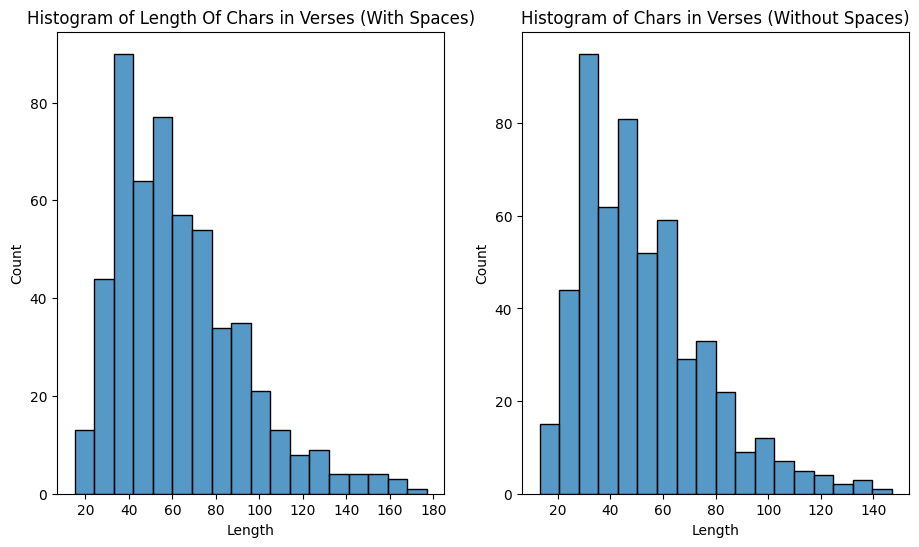

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 
fig, axs = plt.subplots(ncols=2, figsize=(11, 6))

sns.histplot(lst_lenths_spaces, ax=axs[0], kde=False)
sns.histplot(lst_lenths, ax=axs[1], kde=False)

axs[0].set_title('Histogram of Length Of Chars in Verses (With Spaces)')
axs[0].set_xlabel('Length')
axs[0].set_ylabel('Count')
axs[1].set_title('Histogram of Chars in Verses (Without Spaces)')
axs[1].set_xlabel('Length')
axs[1].set_ylabel('Count')

plt.show()

#**Tokens Are Words**

In [16]:
lst_lenths_words=[]
for i in range(len(verses_list_foreach_df[0])):
  c=0
  for char in verses_list_foreach_df[0][i]:
    if char==' ':
        c+=1
  c+=1
  lst_lenths_words.append(c)
    

In [17]:
from IPython import display
display.Markdown(f'## **The largest number of words in a verse is :{max(lst_lenths_words)}**')

## **The largest number of words in a verse is :31**

In [18]:
display.Markdown(f'## **The smallest number of words in a verse is :{min(lst_lenths_words)}**')

## **The smallest number of words in a verse is :2**

In [19]:
display.Markdown(f'## **The Average number of words in a verse is :{np.mean(lst_lenths_words):.2f}**')

## **The Average number of words in a verse is :11.68**

##**Graphs:**

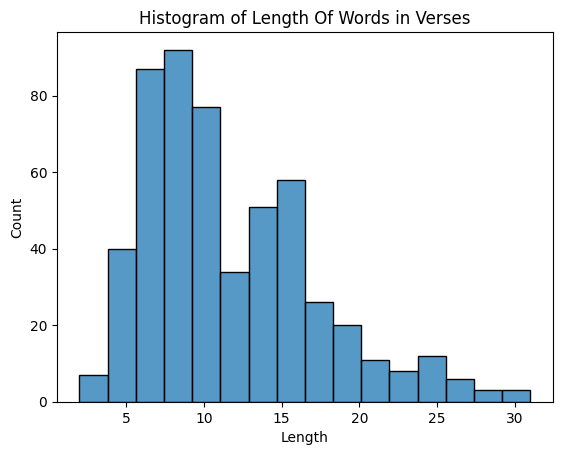

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.histplot(lst_lenths_words, kde=False)
plt.title('Histogram of Length Of Words in Verses')
plt.xlabel('Length')
plt.ylabel('Count')

plt.show()

## **Length of verses per book**

In [21]:
#merge to tuple elements (book,length of verse)
lst_book_chars_spaces=[]
lst_book_chars_nospaces=[]
lst_book_word=[]
for j in range(len(books_list_foreach_df[0])):
  lst_book_word.append((books_list_foreach_df[0][j],lst_lenths_words[j]))
  lst_book_chars_spaces.append((books_list_foreach_df[0][j],lst_lenths_spaces[j]))
  lst_book_chars_nospaces.append((books_list_foreach_df[0][j],lst_lenths[j]))


In [22]:
lst_dicts=[{},{},{}]
index=0
for lst in [lst_book_word,lst_book_chars_spaces,lst_book_chars_nospaces]:
  counter_verse_book=0
  for book,value in lst:
    if book not in lst_dicts[index]:
      lst_dicts[index][book]=value
      if counter_verse_book==0:        
        counter_verse_book=1
        continue
      else:
          lst_dicts[index][list(lst_dicts[index].keys())[len(lst_dicts[index].keys())-2]]=lst_dicts[index][list(lst_dicts[index].keys())[len(lst_dicts[index].keys())-2]]/counter_verse_book
          counter_verse_book=1      
    else:
      lst_dicts[index][book] += value
      counter_verse_book+=1
  lst_dicts[index][book]=lst_dicts[index][book]/counter_verse_book
  index+=1

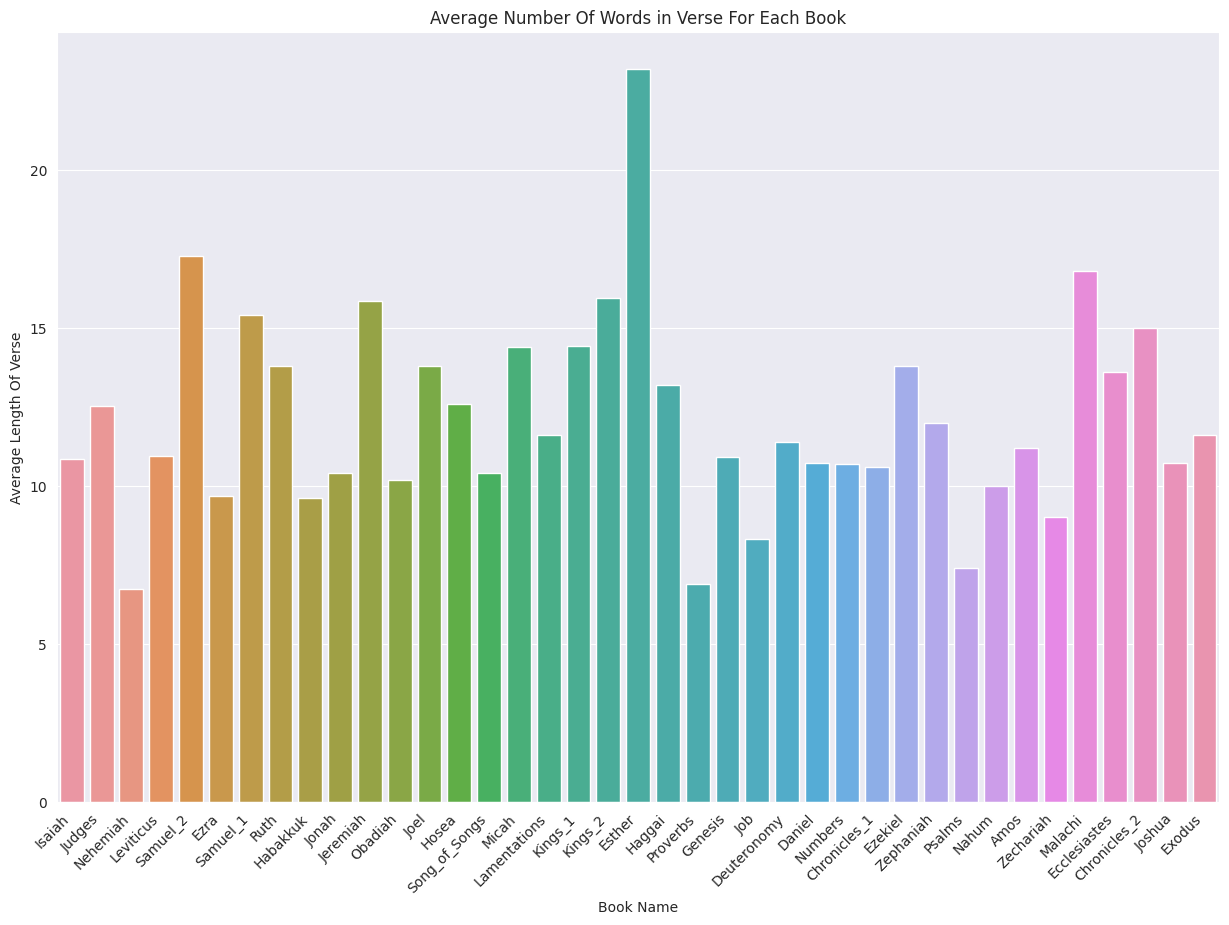

In [23]:
plt.figure(figsize=[15, 10])
# Create a bar plot using seaborn
sns.set_style("darkgrid")
sns.barplot(x=list(lst_dicts[0].keys()), y=list(lst_dicts[0].values()))

plt.xlabel("Book Name")
plt.ylabel("Average Length Of Verse")
plt.xticks(rotation=45, ha="right")
plt.title('Average Number Of Words in Verse For Each Book')
plt.show()


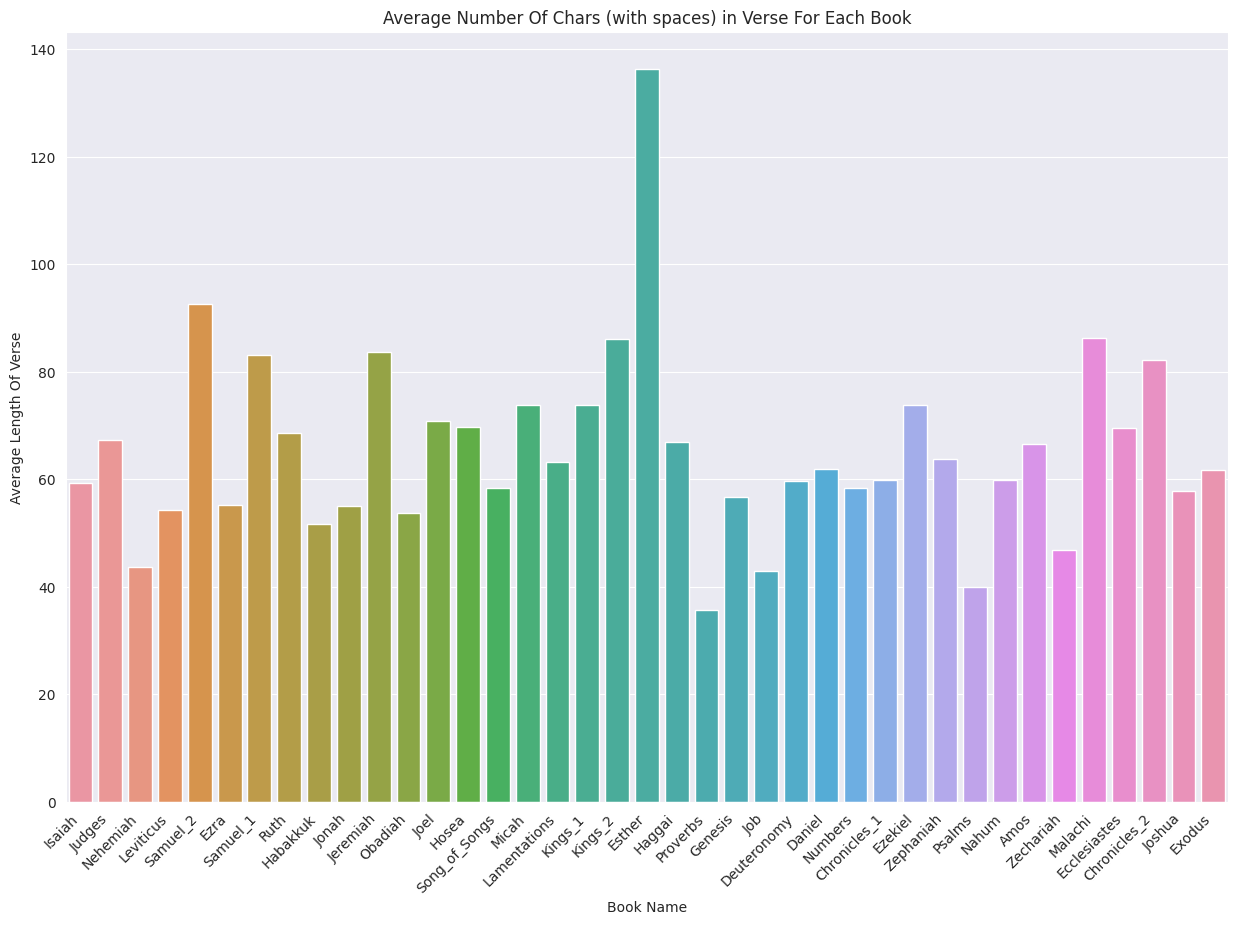

In [24]:
plt.figure(figsize=[15, 10])
# Create a bar plot using seaborn
sns.set_style("darkgrid")
sns.barplot(x=list(lst_dicts[1].keys()), y=list(lst_dicts[1].values()))

plt.xlabel("Book Name")
plt.ylabel("Average Length Of Verse")
plt.xticks(rotation=45, ha="right")
plt.title('Average Number Of Chars (with spaces) in Verse For Each Book')
plt.show()


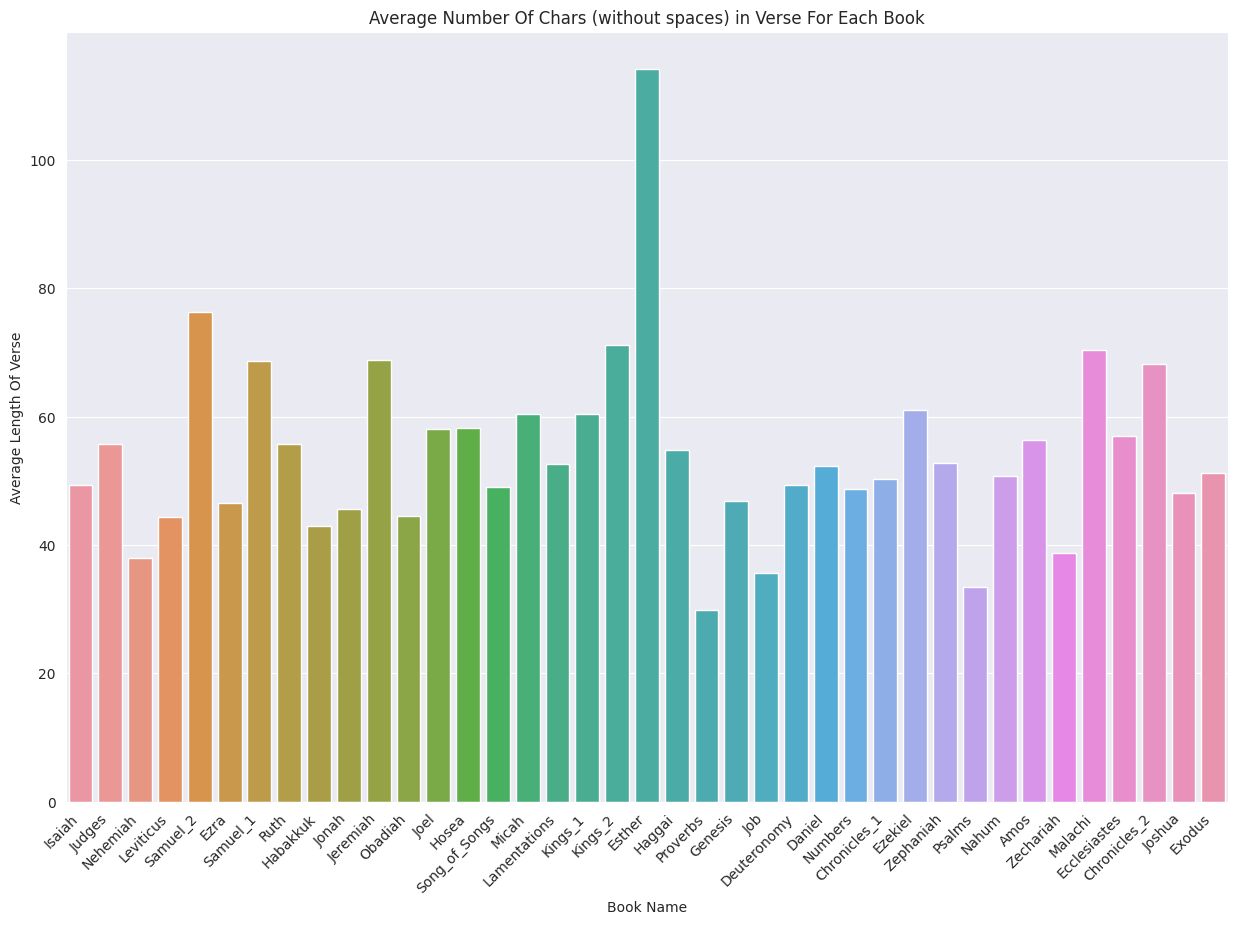

In [25]:
plt.figure(figsize=[15, 10])
# Create a bar plot using seaborn
sns.set_style("darkgrid")
sns.barplot(x=list(lst_dicts[2].keys()), y=list(lst_dicts[2].values()))

plt.xlabel("Book Name")
plt.ylabel("Average Length Of Verse")
plt.xticks(rotation=45, ha="right")
plt.title('Average Number Of Chars (without spaces) in Verse For Each Book')
plt.show()


## **Realtion between amount of masking to tokens to all tokens**

- When token is a char

- When token is a word

In [26]:
sum_chars=0
sum_words=0
for verse in verses_list_foreach_df[8]:
  for char in verse:
    sum_chars+=1
  sum_words+=len(verse.split())
print('The Sum chars is:', sum_chars)
print("The Sum words is:",sum_words)

The Sum chars is: 33489
The Sum words is: 6929


In [35]:
def word_dataset(verse):
  counter_word=0
  verse1=verse.split()
  for word in verse1:
    if '?' not in word:
      continue
    else:
      if word.count('?') == len(word):
        counter_word+=1
  
  return counter_word

def char_dataset(verse):
  counter_chars=0
  verse1=verse.split()
  for word in verse1:
    if '?' not in word:
      continue
    else:
        counter_chars+=word.count('?')
  return counter_chars

In [40]:
lst_counter_sum=[]
for j in range(len(verses_list_foreach_df)):
  counter_chars_or_words=0
  words,chars=0,0
  flag=False
  for verse in verses_list_foreach_df[j]:
    if j>=0 and j<=2:
      words+=word_dataset(verse)
      chars+= char_dataset(verse)
      flag=True
    if j>=3 and j<=5:
      counter_chars_or_words+=char_dataset(verse)
    if j>=6 and j<=8:
      counter_chars_or_words+=word_dataset(verse)
  
  if flag==True:
      lst_counter_sum.append(('chars relation at Mix dataset '+str(j),chars/sum_chars))
      lst_counter_sum.append(('words relation at Mix dataset ' +str(j) ,words/sum_words))
  else:
      if j>=3 and j<=5:
        lst_counter_sum.append(('char relation at Chars dataset '+str(j),counter_chars_or_words/sum_chars))
      else:
        lst_counter_sum.append(('word relation at Wors dataset '+str(j),counter_chars_or_words/sum_words))

In [72]:
import pandas as pd
dict_realtion_tokens=list(dict(lst_counter_sum).values())

data=[{'dataset':'Mix','name':'chars relation 10%','relation':dict_realtion_tokens[0]},
      {'dataset':'Mix','name':'words relation 10%','relation':dict_realtion_tokens[1]},
      {'dataset':'Mix','name':'chars relation 15%','relation':dict_realtion_tokens[2]},
      {'dataset':'Mix','name':'words relation 15%','relation':dict_realtion_tokens[3]},
      {'dataset':'Mix','name':'chars relation 5%','relation':dict_realtion_tokens[4]},
      {'dataset':'Mix','name':'words relation 5%','relation':dict_realtion_tokens[5]},
      {'dataset':'Chars','name':'chars relation 15%','relation':dict_realtion_tokens[6]},
      {'dataset':'Chars','name':'chars relation 25%','relation':dict_realtion_tokens[7]},
      {'dataset':'Chars','name':'chars relation 30%','relation':dict_realtion_tokens[8]},
      {'dataset':'Words','name':'Words relation 15%','relation':dict_realtion_tokens[9]},
      {'dataset':'Words','name':'Words relation 25%','relation':dict_realtion_tokens[10]},
      {'dataset':'Words','name':'Words relation 30%','relation':dict_realtion_tokens[11]}]

df = pd.DataFrame.from_dict(data)


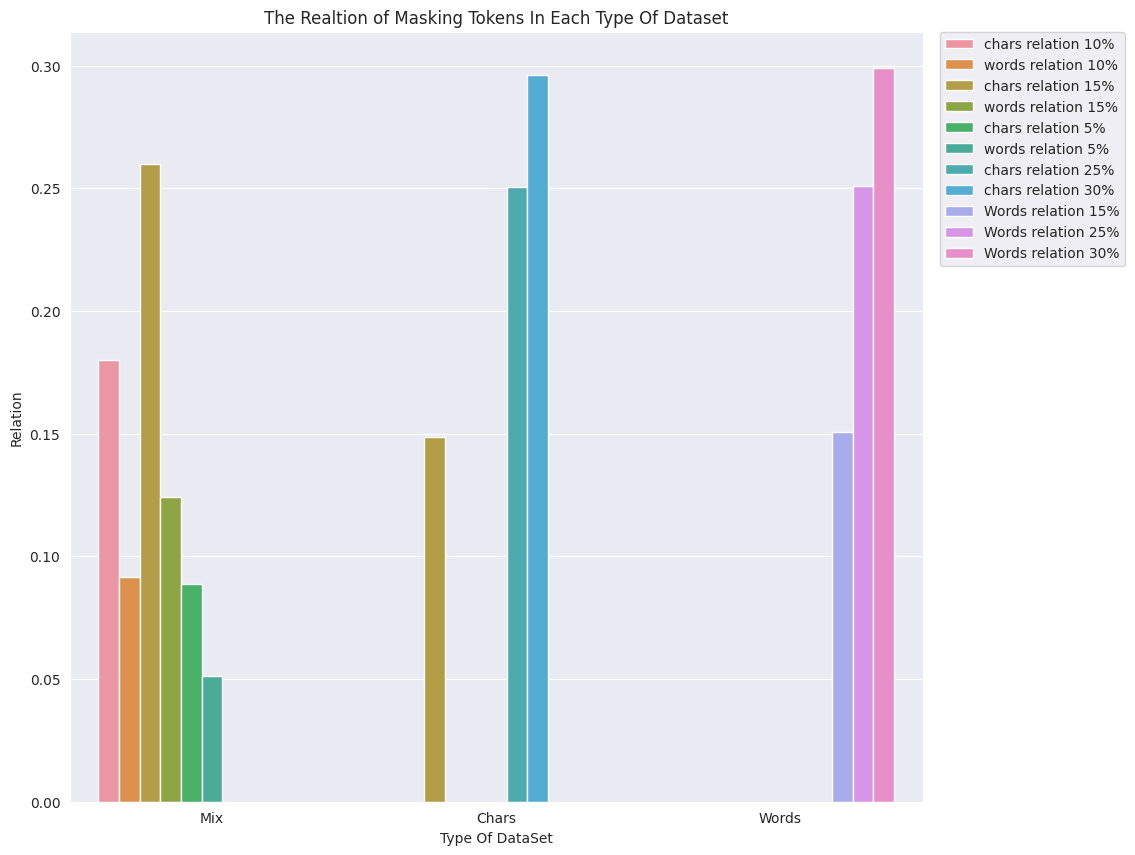

In [75]:
plt.figure(figsize=[11, 10])
sns.set_style("darkgrid")
sns.barplot(data=df, x="dataset", y="relation", hue="name")

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Type Of DataSet")
plt.ylabel("Relation")
plt.title('The Realtion of Masking Tokens In Each Type Of Dataset')
plt.show()